In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('fake_job_postings.csv')

In [3]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.shape

(17880, 18)

In [5]:
df.isnull().sum()#Null values in each feature

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [6]:
df.info()# Information about our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [7]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


# Exploratory Data Analysis

### Features with NaN values

In [8]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

<AxesSubplot:>

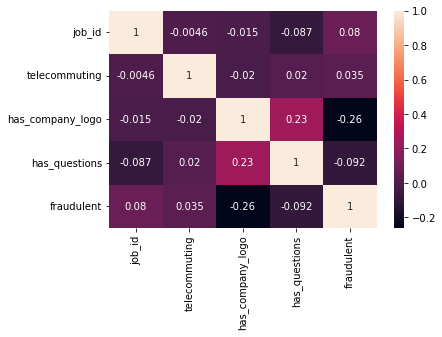

In [9]:
#Correleation between features in the dataset
sns.heatmap(df.corr(),annot=True)

In [10]:
for feature in df.columns:
    print(feature,"has",np.round(df[feature].isnull().mean(),4),"% missing values")

job_id has 0.0 % missing values
title has 0.0 % missing values
location has 0.0194 % missing values
department has 0.6458 % missing values
salary_range has 0.8396 % missing values
company_profile has 0.185 % missing values
description has 0.0001 % missing values
requirements has 0.1507 % missing values
benefits has 0.4032 % missing values
telecommuting has 0.0 % missing values
has_company_logo has 0.0 % missing values
has_questions has 0.0 % missing values
employment_type has 0.1941 % missing values
required_experience has 0.3943 % missing values
required_education has 0.4533 % missing values
industry has 0.2742 % missing values
function has 0.361 % missing values
fraudulent has 0.0 % missing values


### Numerical Features

In [11]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']

In [12]:
df['salary_range'].dtype!='O'

False

In [13]:
numerical_features

['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']

So these are numerical features in the dataset

### Categorical Features

In [14]:
categorical_features=[feature for feature in df.columns if feature not in numerical_features]

In [15]:
categorical_features

['title',
 'location',
 'department',
 'salary_range',
 'company_profile',
 'description',
 'requirements',
 'benefits',
 'employment_type',
 'required_experience',
 'required_education',
 'industry',
 'function']

So these are categorical features in the dataset

In [16]:
#Unique data in each feature of categorical features
for feature in categorical_features:
    print("The feature is",feature,"having categories",len(df[feature].unique()))

The feature is title having categories 11231
The feature is location having categories 3106
The feature is department having categories 1338
The feature is salary_range having categories 875
The feature is company_profile having categories 1710
The feature is description having categories 14802
The feature is requirements having categories 11969
The feature is benefits having categories 6206
The feature is employment_type having categories 6
The feature is required_experience having categories 8
The feature is required_education having categories 14
The feature is industry having categories 132
The feature is function having categories 38


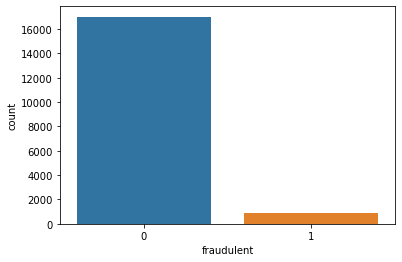

In [17]:
#Let's see the count of the fraudulent and non fraudulent in the dataset
sns.countplot(x='fraudulent',data=df)
plt.show()

In [18]:
df.groupby('fraudulent')['fraudulent'].count()

fraudulent
0    17014
1      866
Name: fraudulent, dtype: int64

# Feature Engineering

In [19]:
# Let's delete the useless features from the dataset
features=['job_id','telecommuting','has_company_logo','has_questions','salary_range','employment_type']
df=df.drop(features,axis=1)#dropping the feature

In [20]:
df

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,Mid-Senior level,NaN,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,NaN,NaN,NaN,NaN,0
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,Not Applicable,Professional,Graphic Design,Design,0


In [21]:
#Fill the NaN values with '' in the dataset
df.fillna('',inplace=True)

In [22]:
df

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,Mid-Senior level,,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,,,,,0
17878,Graphic Designer,"NG, LA, Lagos",,,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,Not Applicable,Professional,Graphic Design,Design,0


In [23]:
df.isnull().sum()

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [24]:
#Experience
exp=dict(df.required_experience.value_counts())
del exp['']

In [25]:
exp

{'Mid-Senior level': 3809,
 'Entry level': 2697,
 'Associate': 2297,
 'Not Applicable': 1116,
 'Director': 389,
 'Internship': 381,
 'Executive': 141}

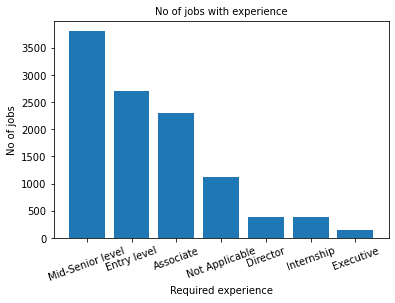

In [34]:
#plt.figure(figsize=(10,10))
plt.bar(exp.keys(),exp.values())
plt.xlabel('Required experience',size=10)
plt.ylabel("No of jobs",size=10)
plt.title("No of jobs with experience",size=10)
plt.xticks(rotation=20,size=10)
plt.yticks(size=10)
plt.show()

In [35]:
def split(location):
    l=location.split(',')
    return l[0]
df['country']=df.location.apply(split)

In [36]:
df

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,Mid-Senior level,,Computer Software,Sales,0,CA
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,,,,,0,US
17878,Graphic Designer,"NG, LA, Lagos",,,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,Not Applicable,Professional,Graphic Design,Design,0,NG


In [37]:
#Countries count
countries=dict(df['country'].value_counts())
del countries['']

In [38]:
countries

{'US': 10656,
 'GB': 2384,
 'GR': 940,
 'CA': 457,
 'DE': 383,
 'NZ': 333,
 'IN': 276,
 'AU': 214,
 'PH': 132,
 'NL': 127,
 'BE': 117,
 'IE': 114,
 'SG': 80,
 'HK': 77,
 'PL': 76,
 'EE': 72,
 'IL': 72,
 'FR': 70,
 'ES': 66,
 'AE': 54,
 'EG': 52,
 'SE': 49,
 'RO': 46,
 'DK': 42,
 'ZA': 40,
 'BR': 36,
 'IT': 31,
 'FI': 29,
 'PK': 27,
 'LT': 23,
 'MY': 21,
 'QA': 21,
 'JP': 20,
 'RU': 20,
 'MX': 18,
 'PT': 18,
 'BG': 17,
 'TR': 17,
 'CN': 15,
 'CH': 15,
 'SA': 15,
 'MU': 14,
 'HU': 14,
 'AT': 14,
 'ID': 13,
 'MT': 13,
 'UA': 13,
 'CY': 11,
 'IQ': 10,
 'KR': 10,
 'TH': 10,
 'NG': 10,
 'AR': 9,
 'LU': 9,
 'BH': 9,
 'BY': 9,
 'PA': 9,
 'NO': 8,
 'RS': 7,
 'KE': 7,
 'CZ': 6,
 'LV': 6,
 'VN': 4,
 'NI': 4,
 'TT': 4,
 'TW': 4,
 'VI': 3,
 'KW': 2,
 'TN': 2,
 'AM': 2,
 'IS': 2,
 'LK': 2,
 'SK': 2,
 'CL': 2,
 'ZM': 2,
 'BD': 2,
 'HR': 1,
 'JM': 1,
 'KZ': 1,
 'SV': 1,
 'CM': 1,
 'PE': 1,
 'AL': 1,
 'GH': 1,
 'MA': 1,
 'SI': 1,
 'CO': 1,
 'SD': 1,
 'UG': 1,
 'KH': 1}

we can see that US is in top

In [39]:
education=dict(df.required_education.value_counts())
del education['']
education

{"Bachelor's Degree": 5145,
 'High School or equivalent': 2080,
 'Unspecified': 1397,
 "Master's Degree": 416,
 'Associate Degree': 274,
 'Certification': 170,
 'Some College Coursework Completed': 102,
 'Professional': 74,
 'Vocational': 49,
 'Some High School Coursework': 27,
 'Doctorate': 26,
 'Vocational - HS Diploma': 9,
 'Vocational - Degree': 6}

In [ ]:
df['required_education'].value_counts()

                                     8105
Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

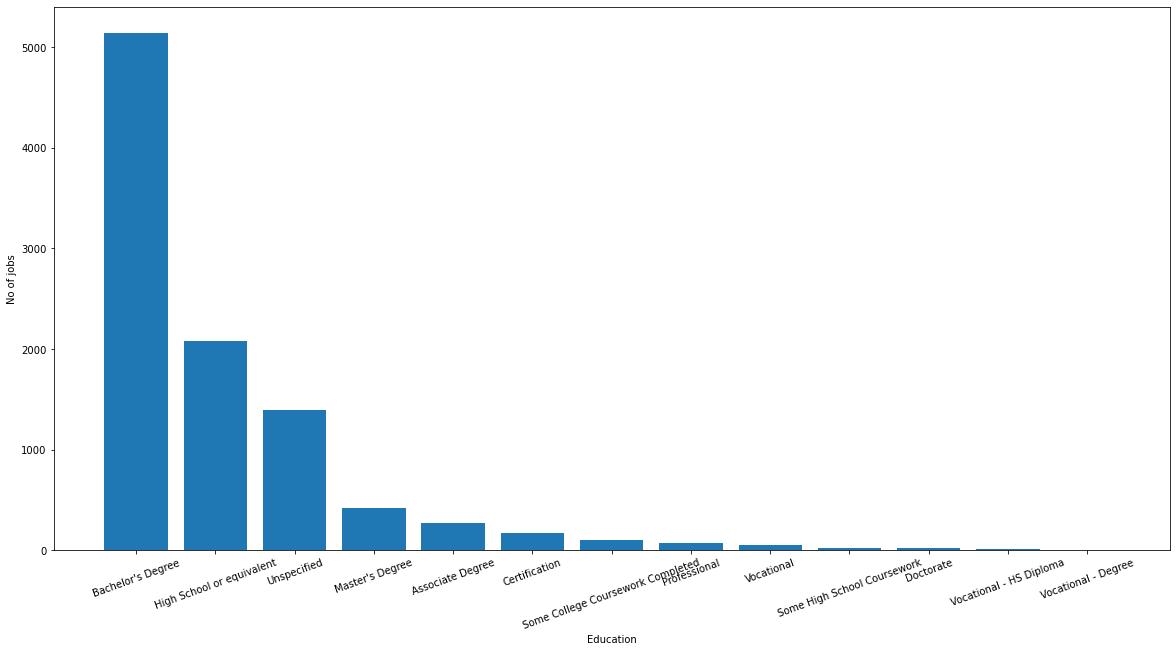

In [ ]:
# Let's visualize the education count
plt.figure(figsize=(20,10))
plt.bar(education.keys(),education.values())
plt.xlabel('Education',size=10)
plt.ylabel('No of jobs',size=10)
plt.xticks(rotation=20,size=10)
plt.yticks(size=10)
plt.show()

In [34]:
print(df[df.fraudulent==0].title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


In [35]:
print(df[df.fraudulent==1].title.value_counts()[:10])

Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: title, dtype: int64


## Storing important features in a new feature

In [36]:
df['text']=df['title']+df['company_profile']+df['description']+df['requirements']+df['benefits']

In [ ]:
df

In [38]:
df#text-independent feature and fraudulent-dependent feature

,fraudulent,text
0,0,"Marketing InternWe're Food52, and we've create..."
1,0,Customer Service - Cloud Video Production90 Se...
2,0,Commissioning Machinery Assistant (CMA)Valor S...
3,0,Account Executive - Washington DCOur passion f...
4,0,Bill Review ManagerSpotSource Solutions LLC is...
...,...,...
17875,0,Account Director - Distribution Vend is lookin...
17876,0,Payroll AccountantWebLinc is the e-commerce pl...
17877,0,Project Cost Control Staff Engineer - Cost Con...
17878,0,Graphic DesignerNemsia Studios is looking for ...


In [39]:
df.tail(60)

,fraudulent,text
17820,1,Office/Personal Assistant (15-20 hours per wee...
17821,1,Webcam ModelInternet Modeling is a premier adu...
17822,1,5 GuysAnalyze the excel books of the franchise...
17823,1,Sales Person RequiredCould this be the most re...
17824,1,Military Benefits CounselorAnthony Warren is a...
17825,1,ADMINISTRATIVE & OFFICE ASSISTANTADMINISTRATIV...
17826,1,Customer Service/Accounting Clerk Cigna Inc is...
17827,1,Student Positions Part-Time and Full-Time.Stud...
17828,1,Sales AssociateLEARN TO EARN AN EXECUTIVE LEVE...
17829,1,Android DeveloperinFullMobile Sp. z o.o. is a ...


In [40]:
# Importing the libraries of NLP
# Data Cleaning and preprocessing
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [154]:
df['text'][17820]

'Office/Personal Assistant (15-20 hours per week)Currently seeking an Office Assistant for our home office on a casual part time basis. This job involves personal and office assistance. Ideally, we are seeking someone who has previous experience in an administrative and/or assistant role.\xa0Primary Responsibilities: (but not limited to) • Dealing with incoming email and post• Organizing and ensuring office area is stocked of supplies• Maintaining office filing system and personal records • Running errands and performing miscellaneous job-related duties as assigned• Assisting with various research projects• Some digital design work/editing will be required• Assisting with various projects and event planning• Incoming and outgoing phone callsQualifications and Abilities:• Ability to work independently• Strong attention to detail• Self-motivated, energetic and highly organized• Ability to multitask, prioritize and handle different tasks• Intermediate experience in Word, Excel, MAC OS is 

In [42]:
wordnet=WordNetLemmatizer()
corpus=[]

In [43]:
fraudulent_job_text=df[df.fraudulent==1].text
real_job_text=df[df.fraudulent==0].text

In [44]:
import spacy

In [45]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

## Let's see the important keywords in the fraudulent_job_text using wordcloud

## Let's see the important keywords in the real_job_text using wordcloud

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
tf=TfidfVectorizer(stop_words='english',max_df=0.7)

In [58]:
X=df['text']

In [59]:
x

0        Marketing InternWe're Food52, and we've create...
1        Customer Service - Cloud Video Production90 Se...
2        Commissioning Machinery Assistant (CMA)Valor S...
3        Account Executive - Washington DCOur passion f...
4        Bill Review ManagerSpotSource Solutions LLC is...
                               ...                        
17875    Account Director - Distribution Vend is lookin...
17876    Payroll AccountantWebLinc is the e-commerce pl...
17877    Project Cost Control Staff Engineer - Cost Con...
17878    Graphic DesignerNemsia Studios is looking for ...
17879    Web Application DevelopersVend is looking for ...
Name: text, Length: 17880, dtype: object

In [60]:
y=df['fraudulent']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [63]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(12516,) (12516,) (5364,) (5364,)


In [64]:
X_train=tf.fit_transform(X_train)

In [65]:
X_test=tf.transform(X_test)

In [67]:
print(X_train.shape,X_test.shape)

(12516, 93537) (5364, 93537)


###  Training the Random Forest 

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf=RandomForestClassifier()

In [70]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [71]:
rf.score(X_train,y_train)

1.0

In [72]:
rf.score(X_test,y_test)

0.9850857568978374

### Making predictions with Random Forest

In [73]:
y_pred=rf.predict(X_test)

In [74]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [75]:
print(accuracy_score(y_pred,y_test))

0.9850857568978374


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5137
           1       0.97      0.67      0.79       227

    accuracy                           0.99      5364
   macro avg       0.98      0.83      0.89      5364
weighted avg       0.98      0.99      0.98      5364



In [77]:
print(confusion_matrix(y_test,y_pred))

[[5133    4]
 [  76  151]]


### Training the Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
lr=LogisticRegression()

In [80]:
lr.fit(X_train,y_train)

LogisticRegression()

In [81]:
lr.score(X_train,y_train)

0.9717162032598274

In [ ]:
lr.score(X_test,y_test)

0.9752050708426547

### Making Prediction with Logistic Regression

In [83]:
y_pred1=lr.predict(X_test)
print(accuracy_score(y_test,y_pred1))

0.9752050708426547


In [84]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5137
           1       0.96      0.43      0.60       227

    accuracy                           0.98      5364
   macro avg       0.97      0.72      0.79      5364
weighted avg       0.97      0.98      0.97      5364



In [85]:
print(confusion_matrix(y_test,y_pred1))

[[5133    4]
 [ 129   98]]


### Training the Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
dt=DecisionTreeClassifier()

In [88]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [89]:
dt.score(X_train,y_train)

1.0

In [90]:
dt.score(X_test,y_test)

0.9727815063385533

### Making predictions with Decision Tree

In [91]:
y_pred2=dt.predict(X_test)
print(accuracy_score(y_pred2,y_test))

0.9727815063385533


In [92]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5137
           1       0.65      0.76      0.70       227

    accuracy                           0.97      5364
   macro avg       0.82      0.87      0.84      5364
weighted avg       0.98      0.97      0.97      5364



In [93]:
print(confusion_matrix(y_test,y_pred2))

[[5045   92]
 [  54  173]]


### Training the Support Vector Machine

In [94]:
from sklearn import svm

In [95]:
sv=svm.SVC()

In [96]:
sv.fit(X_train,y_train)

SVC()

In [97]:
sv.score(X_train,y_train)

0.9956855225311602

In [116]:
sv.score(X_test,y_test)

0.9845264727815063

### Making Predictions with Support Vector Machine

In [99]:
y_pred3=sv.predict(X_test)
print(accuracy_score(y_pred3,y_test))

0.9845264727815063


In [100]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5137
           1       0.97      0.65      0.78       227

    accuracy                           0.98      5364
   macro avg       0.98      0.83      0.89      5364
weighted avg       0.98      0.98      0.98      5364



In [101]:
print(confusion_matrix(y_test,y_pred3))

[[5133    4]
 [  79  148]]


### Training the K-Nearest Neighbors

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5,p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [103]:
knn.score(X_train,y_train)

0.9856184084372004

In [104]:
knn.score(X_test,y_test)

0.9819164802386279

### Making Predictions with K-Nearest Neighbors

In [117]:
y_pred4=knn.predict(X_test)
print(accuracy_score(y_pred4,y_test))

0.9819164802386279


In [118]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5137
           1       0.82      0.74      0.77       227

    accuracy                           0.98      5364
   macro avg       0.90      0.86      0.88      5364
weighted avg       0.98      0.98      0.98      5364



In [119]:
print(confusion_matrix(y_test,y_pred4))

[[5100   37]
 [  60  167]]


## Save the model in pickle file

In [157]:
import joblib
joblib.dump(rf,'fraud_pickle.pkl')

['fraud_pickle.pkl']

In [158]:
clf=joblib.load('fraud_pickle.pkl')

In [159]:
y_prediction=clf.predict(X_test)

In [160]:
def check(text):
    input_data = [text]
    vectorized_input_data = tf.transform(input_data)
    prediction = clf.predict(vectorized_input_data)
    return prediction

In [161]:
print(check('Android DeveloperinFullMobile Sp. z o.o. is a mobile software development house, specializing in the client side of mobile software for clients all around the globe. We are a young company, where you can make the difference, the company structure is horizontal so everyone has a say. We are looking for the best of the best JAVA developers, some out of the box thinking, the courage to get involved with the bleeding edge technologies and projects.• A proven track record in Android / JAVA projects (C, C++, Obj-C is a plus)• Participation in specification and planning of new product modules and features,• A good knowledge of the English language (both written and spoken),• Out-of-the-box thinking and creativity (we care little about the at lines of code you write, but the number of problems you solve),• Following of high quality programming standards,• Keep a track of the industry developments/standards and take the initiative to incorporate these into the company technologies• Team-play (though you will more often than not be working in very small groups),What would make you the perfect candidate:• Hands on experience in development for any Mobile OS platform or technology - iOS, Android, Symbian, WebOS, MeeGo, Maemo, Windows Phone, BlackBerry OS, Series40 or related technologies (e.g. Qt)• Scrum (or other Agile) development method experience,\xa0• Passionate about mobile technology,\xa0• Attention to detailattractive salary (adequate to the candidate skillset) and benefit systemsposition in a company dynamically scaling in the area of new technology working on multiple international markets'))

[1]


In [162]:
print(check('Sales Controller / Assistant  Based in the heart of the City, this exceptional opportunity as Sales Controller / Assistant in a fast-growing tech start-up is a challenging and varied position requiring a highly motivated professional, ideally with a degree, but certainly with an interest in pursuing a career in start-ups / technological businesses.The CompanyRecognised by Wired Magazine as one of Europe’s hottest tech start-ups, Appear Here is the leading marketplace to rent short-term space. Hailed a "digital game changer for the high street" by The Guardian, Appear Here is the simplest way to list and rent flexible retail space online. Our mission is to build a global network of spaces, so people can rent space in cities across the world and take their ideas to destinations near and far.Since launching in 2013, Appear Here lists over 500 spaces nationwide, and has over 5000 brands and retailers using the site. A diverse mix of big names and upcoming brands have all found space for their ideas with Appear Here ranging from Microsoft, Diageo, Google, &amp; the BBC to Serge de Nimes and Stylist Magazine.\xa0The RoleWe’re growing fast, and to support this we’re looking for a Sales Controller for our Commercial Team. This is a fantastic, unique opportunity to join a great team in a hands-on role playing a pivotal role in our on-going growth and success.You will have previously been employed in a sales focussed organisation, with a track record in analysis and forecasting. You should have previous experience with P&amp;L responsibilities as well as cash management. You will be a self-motivated, creative and driven by numbers.\xa0Key areas of responsibility within this Sales Controller role include: Audit the sales teams performance on regular basisResponsible for keeping an up-to-date CRM systemResponsible for making sure the company can predict and follow up on selling\xa0Being proactive in coming up with possible improvements for sellingDrive focus areas for the sales teamAssist the management team with analytics and decisionsAssist the sales team with putting in data and keeping it up to dateThe link between sales team and financeSkills and Qualifications\xa0Previous experience in salesforce, Microsoft Office and other CRM systemsGood in general analytics and understanding figuresGood in communication - both written and spoken+3 years experience in a similar roleExcellent Salaries\xa0Company Benefit PackagesInternational Development\xa0Company Progression &amp; Support schemes'))

[0]


In [163]:
print(check('Office/Personal Assistant (15-20 hours per week)Currently seeking an Office Assistant for our home office on a casual part time basis. This job involves personal and office assistance. Ideally, we are seeking someone who has previous experience in an administrative and/or assistant role.\xa0Primary Responsibilities: (but not limited to) • Dealing with incoming email and post• Organizing and ensuring office area is stocked of supplies• Maintaining office filing system and personal records • Running errands and performing miscellaneous job-related duties as assigned• Assisting with various research projects• Some digital design work/editing will be required• Assisting with various projects and event planning• Incoming and outgoing phone callsQualifications and Abilities:• Ability to work independently• Strong attention to detail• Self-motivated, energetic and highly organized• Ability to multitask, prioritize and handle different tasks• Intermediate experience in Word, Excel, MAC OS is requiredThis is the chance to take ownership of the role, grow within a nationally recognised brand and continue to develop your administration and data analyst skills. You will be professionally presented and have a warm and personable attitude. You will be able to work autonomously as well as occasionally in a team.Training: We provide Probationary Period with support. So you can get all necessary experience in process.If you would like to hear further details please send us your resume with your full name and email'))

[1]


In [164]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5137
           1       0.97      0.67      0.79       227

    accuracy                           0.99      5364
   macro avg       0.98      0.83      0.89      5364
weighted avg       0.98      0.99      0.98      5364



In [ ]:
joblib.dump(tf,'tfidf_job_pickle.pkl')

['tfidf_job_pickle.pkl']